<a href="https://colab.research.google.com/github/Joaovtmendes/Dnc-engineer/blob/main/correla%C3%A7%C3%A3o_alunos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [ ]:
df = pd.read_excel("/content/ aprovacao_alunos.xlsx")
df.head()


,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


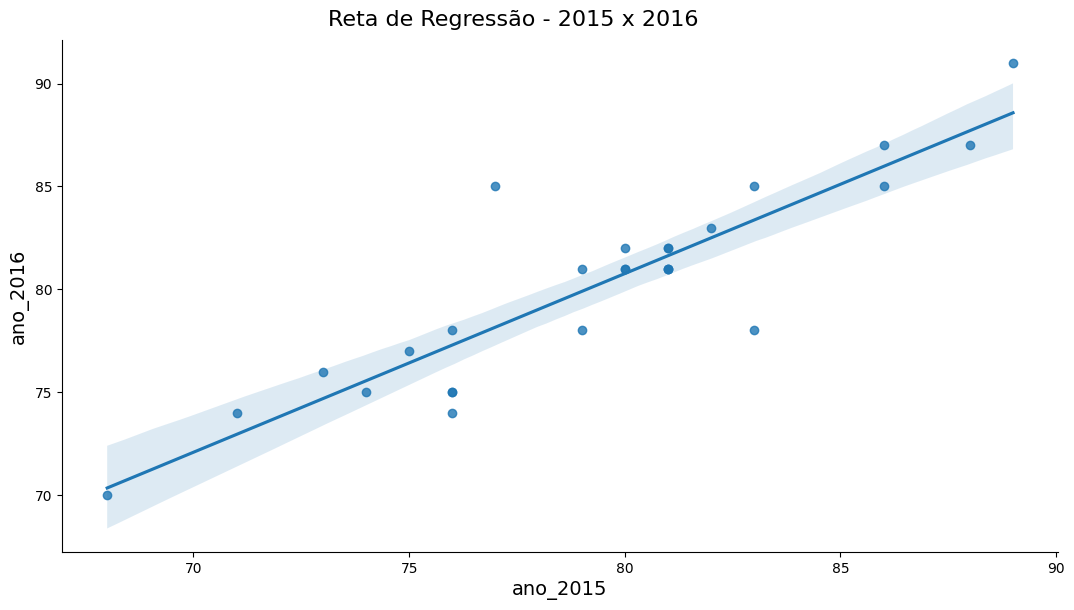

In [ ]:
ax = sns.lmplot(x="ano_2015", y="ano_2016", data=df)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - 2015 x 2016', fontsize=16, y=1.02)
ax.set_xlabels("ano_2015", fontsize=14)
ax.set_ylabels("ano_2016", fontsize=14)
ax;

In [ ]:
correlation = df[["ano_2015","ano_2016"]]
correlation.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [ ]:
Y = correlation.ano_2016
X = sm.add_constant(correlation.ano_2015)

In [ ]:
resultado_regressao = sm.OLS(Y, X).fit()

In [ ]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           3.02e-10
Time:                        07:12:49   Log-Likelihood:                -58.476
No. Observations:                  27   AIC:                             121.0
Df Residuals:                      25   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3143      6.880      1.645      0.1

In [ ]:
correlation['Y_previsto'] = resultado_regressao.predict()
correlation.head()

,ano_2015,ano_2016,Y_previsto
0,77,85,78.159571
1,79,81,79.895812
2,83,85,83.368294
3,81,82,81.632053
4,73,76,74.687089


In [ ]:
correlation["residuo"] = correlation["Y_previsto"] - correlation["ano_2016"]
correlation.head()

,ano_2015,ano_2016,Y_previsto,residuo
0,77,85,78.159571,-6.840429
1,79,81,79.895812,-1.104188
2,83,85,83.368294,-1.631706
3,81,82,81.632053,-0.367947
4,73,76,74.687089,-1.312911
